In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_4 = pd.read_csv("./DATA/suicides2006-2015.csv")
df_4.dropna(axis=1, how='all',inplace=True)
df_4.dropna(axis=0, how='all',inplace=True)
df_4.set_index('Unnamed: 0', inplace=True)
df_4.rename(columns={"Unnamed: 2":"2006","Unnamed: 3":"2007","Unnamed: 4":"2008","Unnamed: 5":"2009","Unnamed: 6":"2010","Unnamed: 7":"2011","Unnamed: 8":"2012","Unnamed: 9":"2013","Unnamed: 10":"2014","Unnamed: 11":"2015"}, inplace=True)
df_4 = df_4.iloc[2:]

In [3]:
num_deaths = df_4.iloc[1:4]
deaths_per_age_group = df_4 .iloc[9:13]
maori_deaths = df_4.iloc[14:16]
non_moari_deaths = df_4.iloc[17:19]

In [4]:
num_deaths.reset_index(inplace=True)
num_deaths.rename(columns={"Unnamed: 0" : "category"}, inplace=True)
num_deaths = num_deaths.T
num_deaths.reset_index(inplace=True)
num_deaths = num_deaths.iloc[2:]
num_deaths.rename(columns={'index' : 'year', 0 : 'male', 1 : 'female', 2 : 'total'}, inplace=True)
num_deaths['male'] = pd.to_numeric(num_deaths['male'])
num_deaths['female'] = pd.to_numeric(num_deaths['female'])
num_deaths['total'] = pd.to_numeric(num_deaths['total'])

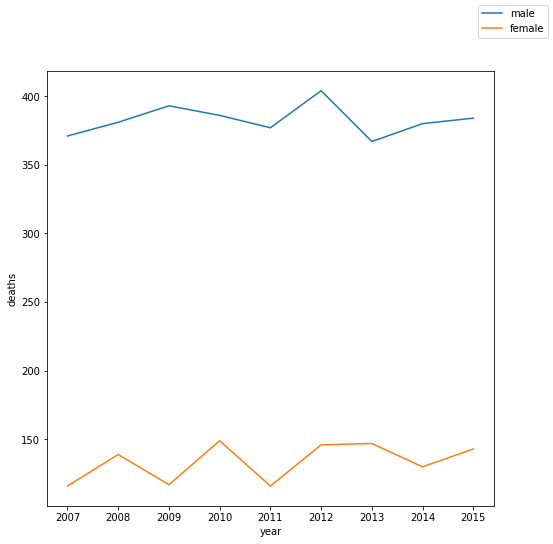

In [5]:
fig = plt.figure(figsize=(8,8))
sns.lineplot(x='year', y='male', data=num_deaths)
sns.lineplot(x='year', y='female', data=num_deaths)
plt.ylabel('deaths')
fig.legend(labels=['male', 'female'])
plt.show()

In [6]:
deaths_per_age_group.reset_index(inplace=True)
deaths_per_age_group.rename(columns={'Unnamed: 0' : 'age_group'}, inplace=True)
df_d = pd.pivot_table(deaths_per_age_group,index="age_group", values=["2006", "2007", "2008","2009","2010","2011","2012","2013","2014","2015"], aggfunc=np.sum)

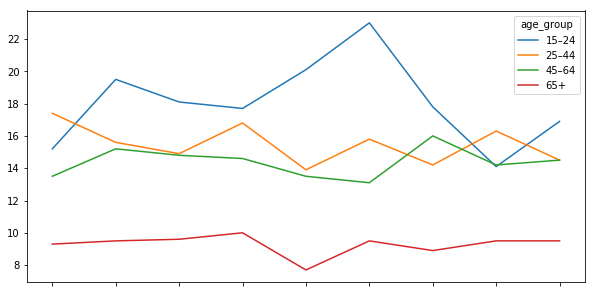

In [7]:
df_d.T.plot.line(figsize=(10,5))